# À propos de ce Dataset

Cette analyse des prix de l'immobilier est réalisée pour répondre aux besoins d'un courtier immobilier qui souhaite améliorer ses décisions en fournissant des conseils personnalisés à ses clients. L'objectif est de prédire les prix des maisons en fonction de critères spécifiques tels que la superficie, le nombre de chambres, et la qualité du quartier.

Pour ce faire, nous utilisons un ensemble de données de régression comprenant 1 000 maisons, chacune avec plusieurs attributs influençant le prix. Ce projet a pour but de développer un modèle de régression qui permettra de mieux comprendre l'impact de chaque facteur et d'offrir des visualisations interactives pour aider à la prise de décision. Ce dataset provenant de Kaggle est idéal pour mettre en pratique des techniques de modélisation par régression et répondre aux besoins analytiques dans le domaine de l'immobilier.

## Caractéristiques:
**Square_Footage** : la taille de la maison en pieds carrés. Les maisons plus grandes ont généralement des prix plus élevés.

**Num_Bedrooms** : Le nombre de chambres dans la maison. Plus il y a de chambres, plus la valeur d'une maison augmente.

**Num_Bathrooms** : Le nombre de salles de bains dans la maison. Les maisons avec plus de salles de bains sont généralement plus chères.

**Année de construction** : année de construction de la maison. Les maisons plus anciennes peuvent être moins chères en raison de l'usure.

**Lot_Size** : La taille du terrain sur lequel la maison est construite, mesurée en acres. Les terrains plus grands ont tendance à ajouter de la valeur à une propriété.

**Garage_Size** : nombre de voitures pouvant entrer dans le garage. Les maisons dotées de garages plus grands sont généralement plus chères.

**Neighborhood_Quality** : évaluation de la qualité du quartier sur une échelle de 1 à 10, où 10 indique un quartier de haute qualité. Les meilleurs quartiers se traduisent généralement par des prix plus élevés.

**House_Price (variable cible)** : Le prix de la maison, qui est la variable dépendante que nous souhaitons prédire.

In [2]:
import pandas as pd
import numpy as np
file_path = r'house_price_regression_dataset.csv'  
df = pd.read_csv(file_path)

## Les premières lignes du dataframe

In [4]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## Traitement des valeurs manquantes 

#### Identifier les valeurs manquantes

In [7]:
# Vérifier s'il y a des valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
missing_values[missing_values > 0]


Series([], dtype: int64)

### Supprimer les lignes avec des valeurs manquantes

In [9]:
# Supprimer les lignes qui contiennent des valeurs manquantes
df_cleaned = df.dropna()
df_cleaned

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


## Correction des types de données

on verifie le type de chaque colonne

In [12]:
print(df.dtypes)

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object


## Suppression des valeurs aberrantes (outliers)

In [14]:
# Par exemple, supprimer les valeurs aberrantes dans la colonne 'Square_Footage'
Q1 = df['Square_Footage'].quantile(0.25)
Q3 = df['Square_Footage'].quantile(0.75)
IQR = Q3 - Q1

# Définir des limites pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# on a définit les bornes pour trouver les valeurs aberrantes, toute valeur en dehors de ces bornes (qui n'est pas entre lower_bound et upper_bound)
# est une valeur aberrante

# Filtrer les données pour supprimer les valeurs aberrantes
df_cleaned = df[(df['Square_Footage'] >= lower_bound) & (df['Square_Footage'] <= upper_bound)]
df_cleaned

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


##  Transformation des données

Nous avons normalisé la colonne House_Price pour ramener les valeurs dans un intervalle de 0 à 1, ce qui permet de standardiser l'échelle des données et de faciliter l'entraînement des modèles de machine learning en évitant que certaines caractéristiques aient plus de poids simplement en raison de leur échelle.

In [17]:
# Normaliser la colonne 'House_Price' pour que les valeurs soient entre 0 et 1
df['House_Price_Normalized'] = (df['House_Price'] - df['House_Price'].min()) / (df['House_Price'].max() - df['House_Price'].min())
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,0.151269
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,0.876606
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,0.668617
3,966,1,2,1977,2.730667,1,8,2.296989e+05,0.118474
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,0.933278
...,...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05,0.591874
996,3179,1,2,1999,2.977123,1,10,6.837232e+05,0.574042
997,2606,4,2,1962,4.055067,0,2,5.720240e+05,0.461963
998,4723,5,2,1950,1.930921,0,7,9.648653e+05,0.856141


## Création de nouvelles colonnes

In [19]:
# Créer une nouvelle colonne 'Prix_par_Pied_Carré'
df['Prix_par_Pied_Carré'] = df['House_Price'] / df['Square_Footage']

## Vérification finale

In [21]:
# Vérifier que les transformations sont correctes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Square_Footage          1000 non-null   int64  
 1   Num_Bedrooms            1000 non-null   int64  
 2   Num_Bathrooms           1000 non-null   int64  
 3   Year_Built              1000 non-null   int64  
 4   Lot_Size                1000 non-null   float64
 5   Garage_Size             1000 non-null   int64  
 6   Neighborhood_Quality    1000 non-null   int64  
 7   House_Price             1000 non-null   float64
 8   House_Price_Normalized  1000 non-null   float64
 9   Prix_par_Pied_Carré     1000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 78.3 KB


In [22]:
# Afficher un résumé statistique des données nettoyées
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,House_Price_Normalized,Prix_par_Pied_Carré
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05,0.508960,226.917962
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05,0.254431,26.925402
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05,0.000000,176.012388
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05,0.291008,211.446222
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05,0.518398,219.595509
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05,0.717948,234.179240
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06,1.000000,430.613354


##  Distribution des variables
Visualiser la distribution des variables permet de comprendre comment les données sont réparties 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


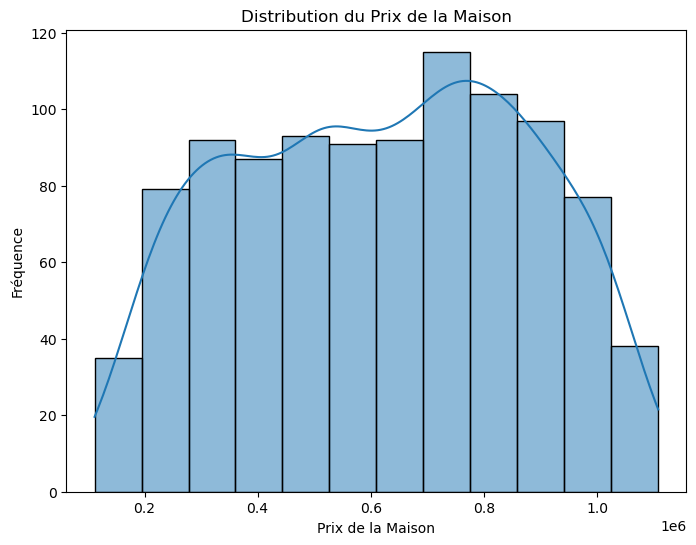

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution du prix de la maison
plt.figure(figsize=(8, 6))
sns.histplot(df['House_Price'], kde=True)
plt.title('Distribution du Prix de la Maison')
plt.xlabel('Prix de la Maison')
plt.ylabel('Fréquence')
plt.show()

## Boxplot pour analyser les variables catégoriques 

Ce code affiche un boxplot qui montre la répartition du prix des maisons en fonction de la qualité du quartier. Cela permet de visualiser la manière dont les prix varient selon les différentes catégories de qualité de quartier.

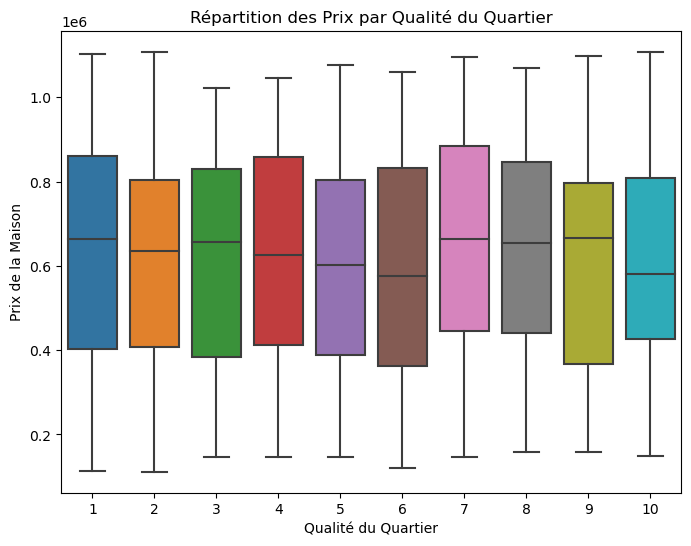

In [27]:
# Boxplot pour la qualité du quartier et le prix de la maison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Neighborhood_Quality', y='House_Price', data=df)
plt.title('Répartition des Prix par Qualité du Quartier')
plt.xlabel('Qualité du Quartier')
plt.ylabel('Prix de la Maison')
plt.show()

## Heatmap pour la corrélation entre les variables

Ce code génère une heatmap pour afficher les corrélations entre les différentes variables, en excluant la colonne House_Price_Normalized. La heatmap aide à identifier les relations fortes ou faibles entre les variables utilisées dans l'analyse.

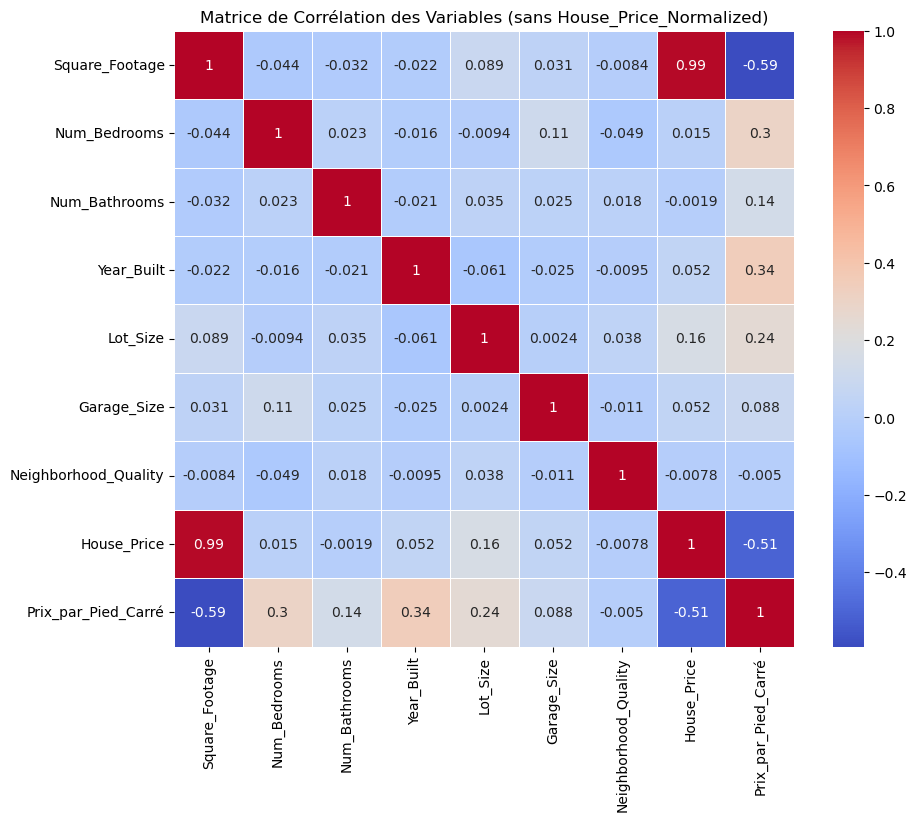

In [30]:
# Calculer la matrice de corrélation en excluant 'House_Price_Normalized'
correlation_matrix = df.drop(columns=['House_Price_Normalized']).corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables (sans House_Price_Normalized)')
plt.show()


## Barplot pour visualiser des moyennes ou des totaux

Ce code crée un barplot qui montre la moyenne du prix des maisons en fonction de la qualité du quartier. Il permet de comparer les prix moyens des maisons dans les quartiers avec différentes qualités.

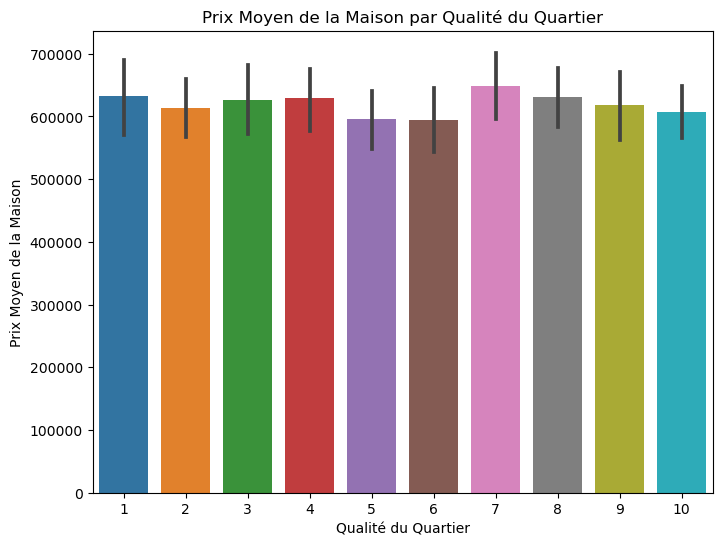

In [33]:
# Barplot pour la moyenne du prix de la maison en fonction de la qualité du quartier
plt.figure(figsize=(8, 6))
sns.barplot(x='Neighborhood_Quality', y='House_Price', data=df)
plt.title('Prix Moyen de la Maison par Qualité du Quartier')
plt.xlabel('Qualité du Quartier')
plt.ylabel('Prix Moyen de la Maison')
plt.show()

## Analyse des valeurs aberrantes

Le boxplot ici permet de détecter les valeurs aberrantes dans la variable Superficie. Il identifie les valeurs extrêmes en dehors des limites normales, facilitant ainsi l'analyse des anomalies dans les données.

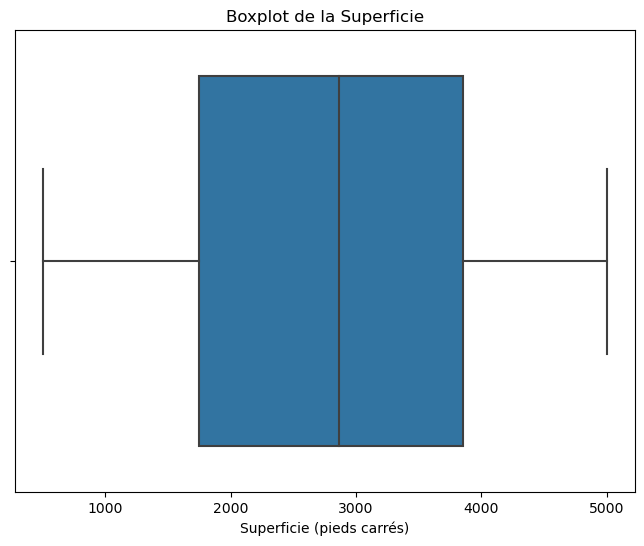

In [36]:
# Boxplot pour visualiser les valeurs aberrantes dans la superficie
plt.figure(figsize=(8, 6))
sns.boxplot(x='Square_Footage', data=df)
plt.title('Boxplot de la Superficie')
plt.xlabel('Superficie (pieds carrés)')
plt.show()

## Relation entre deux variables (nuage de points)

Ce graphique montre un nuage de points et une ligne de régression linéaire entre la superficie des maisons et leur prix. Il aide à visualiser la corrélation linéaire entre ces deux variables et montre la tendance générale.

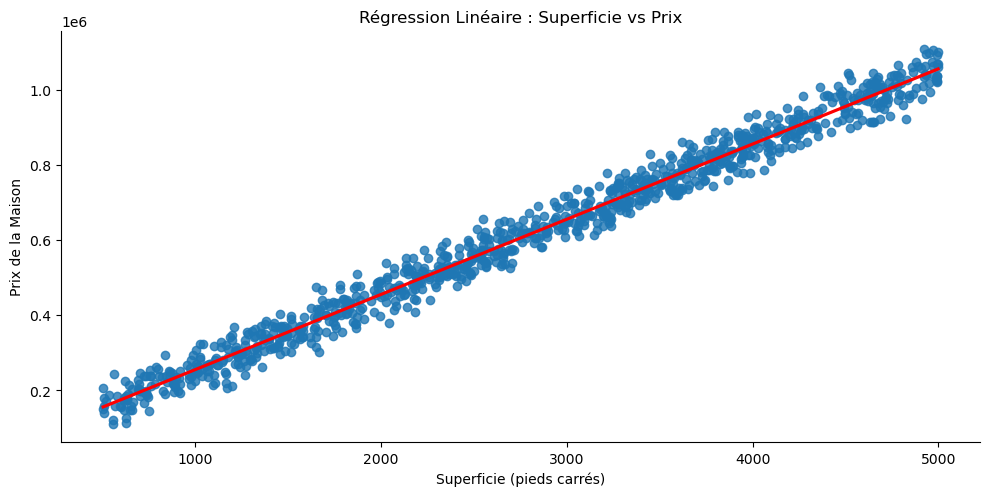

In [39]:
sns.lmplot(x='Square_Footage', y='House_Price', data=df, aspect=2, line_kws={'color':'red'})
plt.title('Régression Linéaire : Superficie vs Prix')
plt.xlabel('Superficie (pieds carrés)')
plt.ylabel('Prix de la Maison')
plt.show()

### Machine Learning : Régression linéaire

Dans ce code, nous utilisons un modèle de régression linéaire pour prédire le prix des maisons en fonction de plusieurs variables explicatives : la superficie (Square_Footage), le nombre de chambres (Num_Bedrooms), et le nombre de salles de bain (Num_Bathrooms). Nous traçons ensuite la courbe d'apprentissage pour visualiser l'évolution de la performance du modèle à mesure que la taille de l'ensemble d'entraînement augmente. Les courbes montrent comment le modèle s'ajuste et généralise, avec le score d'entraînement (en rouge) et le score de validation (en bleu). Cela permet de vérifier si le modèle est bien calibré pour prédire les prix.

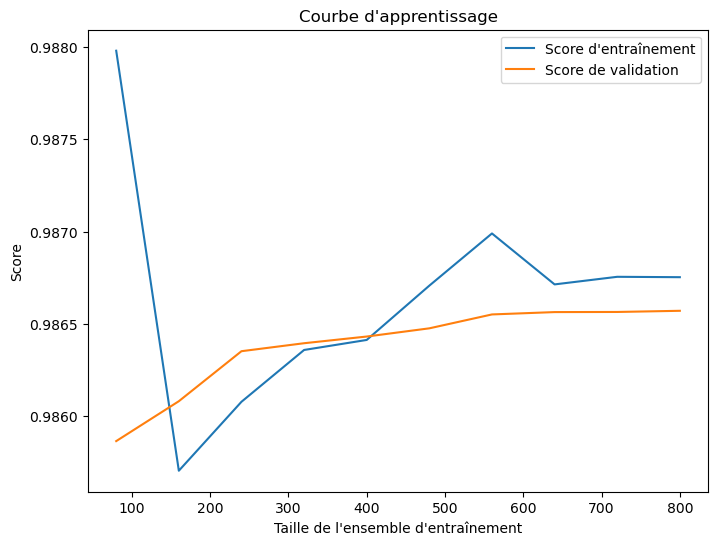

In [42]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms']]  # Variables explicatives
y = df['House_Price']  # Variable cible

model = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Score d\'entraînement')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Score de validation')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.legend()
plt.show()


## Division des données en ensemble d'entraînement et de test

Dans cette cellule, nous divisons les données en deux ensembles : 
- **Ensemble d'entraînement (80%)** : Utilisé pour entraîner le modèle.
- **Ensemble de test (20%)** : Utilisé pour évaluer la performance du modèle sur des données non vues pendant l'entraînement.
Cette étape permet de tester la capacité du modèle à généraliser ses prédictions.


In [43]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")


Taille de l'ensemble d'entraînement: (800, 3)
Taille de l'ensemble de test: (200, 3)


## Entraînement du modèle de régression linéaire
Cette cellule entraîne un modèle de régression linéaire sur l'ensemble d'entraînement. Après l'entraînement, nous affichons les **coefficients** du modèle (qui indiquent l'importance de chaque variable explicative) ainsi que l'**intercept**, qui est la constante ajoutée aux prédictions.


In [44]:
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Afficher les coefficients du modèle
print("Coefficients du modèle:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients du modèle: [  201.16220341 10111.38168614  9342.06021727]
Intercept: 4092.0296718559694


## Prédictions sur l'ensemble de test

Ici, nous effectuons des prédictions sur l'ensemble de test à l'aide du modèle de régression linéaire entraîné. Nous comparons ensuite les **valeurs réelles** aux **valeurs prédites** pour voir comment le modèle se comporte sur des données qu'il n'a jamais vues.


In [45]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Comparer les prédictions aux valeurs réelles
comparison = pd.DataFrame({'Valeur réelle': y_test, 'Valeur prédite': y_pred})
print(comparison.head())


     Valeur réelle  Valeur prédite
521   9.010005e+05    8.508310e+05
737   4.945375e+05    5.084529e+05
740   9.494042e+05    9.893012e+05
660   1.040389e+06    1.025789e+06
411   7.940100e+05    7.569829e+05


## Évaluation du modèle avec les métriques de régression

Dans cette cellule, nous utilisons des métriques de régression pour évaluer la performance du modèle :
- **MAE (Mean Absolute Error)** : Mesure l'erreur moyenne absolue entre les prédictions et les valeurs réelles.
- **RMSE (Root Mean Squared Error)** : Fournit une idée de la dispersion des erreurs.
- **R² (Coefficient de détermination)** : Indique la proportion de la variance des données expliquée par le modèle. Plus la valeur est proche de 1, mieux le modèle s'ajuste aux données.


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcul des métriques de performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erreur absolue moyenne): {mae}")
print(f"RMSE (Racine de l'erreur quadratique moyenne): {rmse}")
print(f"R² (Coefficient de détermination): {r2}")


MAE (Erreur absolue moyenne): 23384.98317609937
RMSE (Racine de l'erreur quadratique moyenne): 29092.568367555687
R² (Coefficient de détermination): 0.9868694920685783


## Graphique des résidus

Les **résidus** représentent la différence entre les valeurs réelles et les valeurs prédites. Un graphique des résidus permet de visualiser s'il existe des **patterns** non capturés par le modèle. Si les résidus sont aléatoires, cela signifie que le modèle est bien ajusté. Des patterns dans les résidus peuvent indiquer un problème avec le modèle.


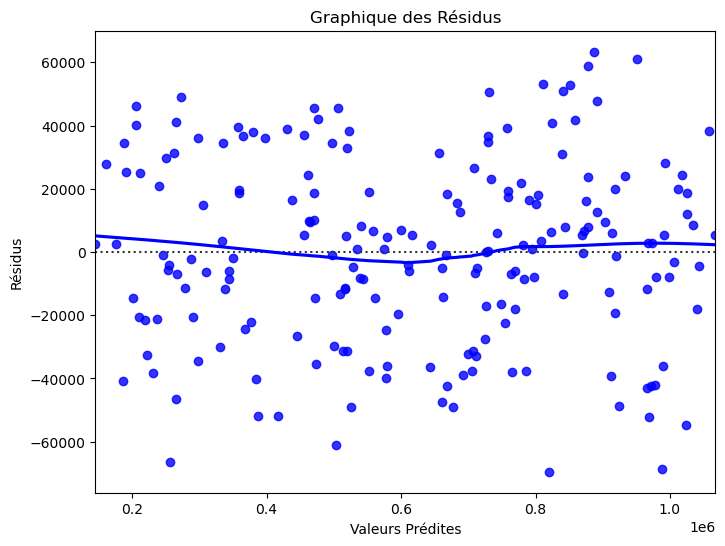

In [47]:
import seaborn as sns

# Calcul des résidus
residuals = y_test - y_pred

# Tracer le graphique des résidus
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.title('Graphique des Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()


## Courbe des prédictions vs valeurs réelles

Ce graphique visualise la relation entre les **valeurs prédites** et les **valeurs réelles**. Une ligne diagonale indique une correspondance parfaite entre les prédictions et les valeurs réelles. Plus les points sont proches de cette ligne, plus les prédictions du modèle sont précises.


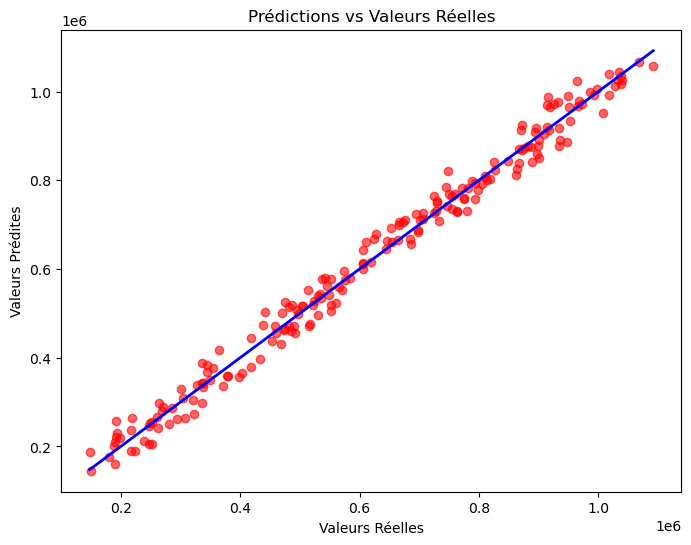

In [48]:
# Tracer la courbe des prédictions vs valeurs réelles
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.title('Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.show()


## Prédiction sur de nouvelles données

Cette cellule montre comment le modèle peut être utilisé pour prédire le prix d'une maison en fonction de nouvelles données. Ici, nous fournissons un exemple avec une nouvelle maison ayant des caractéristiques spécifiques (superficie, nombre de chambres, et nombre de salles de bain), et le modèle prédit son prix en conséquence.


In [49]:
# Exemple de nouvelles données
new_data = pd.DataFrame({'Square_Footage': [2500], 'Num_Bedrooms': [4], 'Num_Bathrooms': [3]})

# Prédire le prix pour ces nouvelles données
predicted_price = model.predict(new_data)
print(f"Prix prédit pour la nouvelle maison : {predicted_price[0]}")


Prix prédit pour la nouvelle maison : 575469.2455835514
